In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('movies_post_eda.csv')
df.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [10]:
df.describe()

,budget,popularity,runtime,revenue,homepage_bool,belongs_to_collection_bool,usa_production,Paramount Pictures,Universal Pictures,Warner Bros.,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,2.188000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.089305e+07,8.463274,107.856571,6.672585e+07,0.315333,0.201333,0.760667,0.053667,0.063333,0.071000,...,0.100333,0.033333,0.075000,0.002333,0.190333,0.096667,0.000333,0.263000,0.033333,0.014333
std,4.026785e+07,12.104000,22.086434,1.375323e+08,0.464726,0.401063,0.426748,0.225396,0.243602,0.256868,...,0.300494,0.179535,0.263435,0.048256,0.392630,0.295553,0.018257,0.440336,0.179535,0.118881
min,1.000000e+00,0.000001,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.150000e+06,4.018053,94.000000,2.379808e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.600000e+07,7.374861,104.000000,1.680707e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,10.890983,118.000000,6.891920e+07,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.800000e+08,294.337037,338.000000,1.519558e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isna().sum()

budget                        812
original_language               0
popularity                      0
runtime                         2
revenue                         0
homepage_bool                   0
belongs_to_collection_bool      0
prod_companies                  0
usa_production                  0
Paramount Pictures              0
Universal Pictures              0
Warner Bros.                    0
Metro-Goldwyn-Mayer (MGM)       0
Fox                             0
Columbia Pictures               0
Walt Disney Pictures            0
lang_num                       20
has_tagline                     0
cast_size                      13
crew_size                      16
year                            0
month                           0
weekday                         0
genre_name                      0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary   

In [12]:
df.drop(labels='genre_name',axis=1,inplace=True)


In [26]:
df.drop(labels='prod_companies',axis=1,inplace=True)

In [27]:
df.columns

Index(['budget', 'original_language', 'popularity', 'runtime', 'revenue',
       'homepage_bool', 'belongs_to_collection_bool', 'usa_production',
       'Paramount Pictures', 'Universal Pictures', 'Warner Bros.',
       'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures', 'lang_num', 'has_tagline', 'cast_size',
       'crew_size', 'year', 'month', 'weekday', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'None',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [14]:
df.dtypes

budget                        float64
original_language              object
popularity                    float64
runtime                       float64
revenue                         int64
homepage_bool                   int64
belongs_to_collection_bool      int64
prod_companies                 object
usa_production                  int64
Paramount Pictures              int64
Universal Pictures              int64
Warner Bros.                    int64
Metro-Goldwyn-Mayer (MGM)       int64
Fox                             int64
Columbia Pictures               int64
Walt Disney Pictures            int64
lang_num                      float64
has_tagline                     int64
cast_size                     float64
crew_size                     float64
year                            int64
month                           int64
weekday                         int64
Action                          int64
Adventure                       int64
Animation                       int64
Comedy      

In [15]:
print(df.isna().sum())
df.loc[df['lang_num'].isna(),'lang_num'] = 1

budget                        812
original_language               0
popularity                      0
runtime                         2
revenue                         0
homepage_bool                   0
belongs_to_collection_bool      0
prod_companies                  0
usa_production                  0
Paramount Pictures              0
Universal Pictures              0
Warner Bros.                    0
Metro-Goldwyn-Mayer (MGM)       0
Fox                             0
Columbia Pictures               0
Walt Disney Pictures            0
lang_num                       20
has_tagline                     0
cast_size                      13
crew_size                      16
year                            0
month                           0
weekday                         0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama         

We have other missing values that cannot be dealt with so easily – we want to get rid of them through inputation. First we'll split the data into train and test data so that information from the test data does not contaminate our inputation values.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels='revenue',axis=1),df['revenue'],test_size = 0.3)

In [17]:
X_train.isna().sum()

budget                        556
original_language               0
popularity                      0
runtime                         2
homepage_bool                   0
belongs_to_collection_bool      0
prod_companies                  0
usa_production                  0
Paramount Pictures              0
Universal Pictures              0
Warner Bros.                    0
Metro-Goldwyn-Mayer (MGM)       0
Fox                             0
Columbia Pictures               0
Walt Disney Pictures            0
lang_num                        0
has_tagline                     0
cast_size                       9
crew_size                      11
year                            0
month                           0
weekday                         0
Action                          0
Adventure                       0
Animation                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family        

First, we replace the missing runtime values with the mean, as runtime is fairly normally distributed, as shown in data wrangling stage.

In [19]:
runtime_mean = X_train['runtime'].mean()
X_train['runtime'].fillna(runtime_mean,inplace=True)
X_test['runtime'].fillna(runtime_mean,inplace=True)

As we saw in EDA and wrangling, all three of the remaining features with missing values are highly right-skewed, so we will use median for inputation.

count    2091.000000
mean       20.857484
std        16.729190
min         0.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       156.000000
Name: cast_size, dtype: float64
16.0


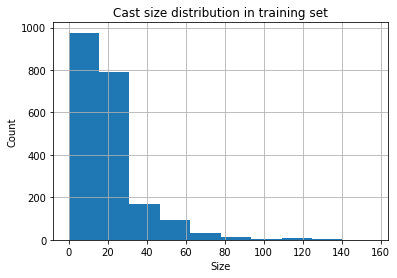

In [20]:

print(X_train['cast_size'].describe())
print(X_train['cast_size'].median())
X_train['cast_size'].hist()
plt.title('Cast size distribution in training set')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

Because cast size is skewed right, we'll use median for inputation, as it's more outlier resistant. The same is true for crew size, as we know from our EDA, so we'll do the same for it as well. We will inpute the median from our training group to the test group's missing values as well.

In [21]:
cast_med = X_train['cast_size'].median()
X_train['cast_size'].fillna(cast_med,inplace=True)
X_test['cast_size'].fillna(cast_med,inplace=True)

In [22]:
crew_med = X_train['crew_size'].median()
X_train['crew_size'].fillna(crew_med,inplace=True)
X_test['crew_size'].fillna(crew_med,inplace=True)

All we have left with NAs is budget, which also has the same right skew issue. We will inpute medians there as well.

In [23]:
budg_med = X_train['budget'].median()
X_train['budget'].fillna(budg_med,inplace=True)
X_test['budget'].fillna(budg_med,inplace=True)

Now we have no more missing values.

We don't have any categorical variables left, so all we have to do is scale our data.

In [25]:
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
names = X_train.columns
X_train_scaled = pd.DataFrame(X_train_scaled,columns=names)
X_train_scaled.head()


ValueError: could not convert string to float: 'en'

In [16]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=names)
X_test_scaled.head()

,budget,popularity,runtime,homepage_bool,belongs_to_collection_bool,en_film,procoun_num,usa_production,lang_num,released,...,Horror,Music,Mystery,None,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,-0.684287,5.446263,-0.146477,1.475468,-0.504460,0.397871,0.077091,0.550943,-0.519139,0.021827,...,-0.347272,-0.196407,-0.286211,-0.048853,-0.465495,-0.335094,-0.021827,-0.582482,-0.182933,-0.124394
1,-0.297007,-0.280124,0.756319,-0.677751,-0.504460,0.397871,-0.454675,0.550943,1.800418,0.021827,...,-0.347272,-0.196407,-0.286211,-0.048853,2.148249,-0.335094,-0.021827,1.716790,-0.182933,-0.124394
2,-0.297007,-0.736000,-1.001758,-0.677751,-0.504460,0.397871,-0.986441,0.550943,-0.519139,0.021827,...,-0.347272,-0.196407,-0.286211,-0.048853,2.148249,-0.335094,-0.021827,-0.582482,-0.182933,-0.124394
3,1.445061,0.629662,-0.241508,1.475468,1.982316,0.397871,-0.986441,0.550943,0.640640,0.021827,...,-0.347272,-0.196407,-0.286211,-0.048853,-0.465495,-0.335094,-0.021827,1.716790,-0.182933,-0.124394
4,-0.766879,-0.720507,0.471225,-0.677751,-0.504460,-2.513379,0.077091,-1.815070,0.640640,0.021827,...,-0.347272,-0.196407,-0.286211,-0.048853,-0.465495,-0.335094,-0.021827,1.716790,-0.182933,-0.124394


In [17]:
X_train_scaled.to_csv('preprocessed_data/X_sc_train.csv',index=False)
X_test_scaled.to_csv('preprocessed_data/X_sc_test.csv',index=False)
y_train.to_csv('preprocessed_data/y_train.csv',index=False)
y_test.to_csv('preprocessed_data/y_test.csv',index=False)

Save our data to preprocessed_data folder.